In [1]:
from univariate_tools import *

In [2]:
x_data = np.linspace(-5,5,100)

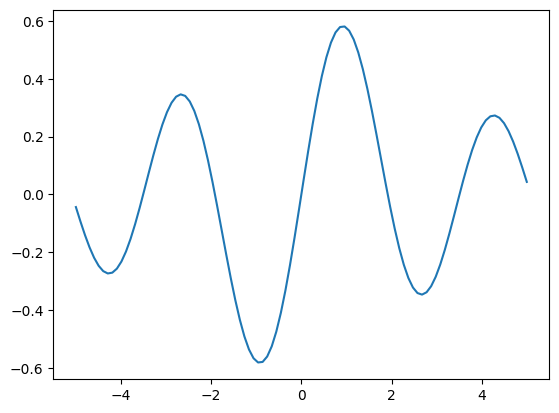

In [3]:
model = FunctionalModel(parameters = ["a","b"],variables =["x"],equation="a*besselj(1,b*x)")
model.set_parameters({"a":1,"b":2})
plt.plot(x_data,model(x_data))

In [4]:
bd = model.d(order=2)

In [5]:
bd.equation

a*b*(-b*(besselj(1, b*x)/2 - besselj(3, b*x)/2)/2 - b*besselj(1, b*x)/2)

In [6]:
sin = FunctionalModel(parameters = "phi A omega f lamda",variables="t x",equation = "A*sin(2*pi*f*t+2*pi/lamda*x+phi)")

In [7]:
sin.equation

A*sin(2*pi*f*t + phi + 2*pi*x/lamda)

In [8]:
sin_squared = sin**2

In [9]:
sin_squared.equation

A**2*sin(2*pi*f*t + phi + 2*pi*x/lamda)**2

In [10]:
d_sin_squared=sin_squared.d(respect_to="x")

In [11]:
d_sin_squared.equation

4*pi*A**2*sin(2*pi*f*t + phi + 2*pi*x/lamda)*cos(2*pi*f*t + phi + 2*pi*x/lamda)/lamda

In [12]:
model = FunctionalModel(parameters = "a", variables="x",equation="a*x**2/(x+1)")

In [19]:
im =sympy.integrate(model.equation,("x"))

ValueError: Invalid limits given: ('x',)

In [18]:
im

a*(-1/2 + log(2))

In [20]:
model.equation

a*x**2/(x + 1)